SVR

load and explore the dataset

In [62]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Salary_Data.csv")
df.head()

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0


In [63]:
df.describe()

,Years of Experience,Salary
count,6701.000000,6699.000000
mean,8.094687,115326.964771
std,6.059003,52786.183911
min,0.000000,350.000000
25%,3.000000,70000.000000
50%,7.000000,115000.000000
75%,12.000000,160000.000000
max,34.000000,250000.000000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6701 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 104.9 KB


In [65]:
df.isnull().sum()

,0
Years of Experience,3
Salary,5


In [66]:
df.dropna(inplace=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6699 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 157.0 KB


feature scaling

In [68]:
from sklearn.preprocessing import StandardScaler
x = df[['Years of Experience']].values
y = df[['Salary']].values
sc_x = StandardScaler()
sc_y = StandardScaler()
x_scaled = sc_x.fit_transform(x)
y_scaled = sc_y.fit_transform(y)

flatten for SVR

In [69]:
y_scaled

array([[-0.47983873],
       [-0.95348286],
       [ 0.65690718],
       ...,
       [-1.14294051],
       [ 0.46744953],
       [-1.52185581]])

train svr model

In [70]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf',C=100,epsilon=0.1)
svr.fit(x_scaled,y_scaled.ravel())

SVR(C=100)

prediction and inverse scaling

In [71]:
y_pred_scaled = svr.predict(x_scaled)
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))

In [72]:
y_pred_scaled

array([-0.44592988, -0.95928686,  1.16101663, ..., -0.71943669,
        1.02434885, -1.33765207])

In [73]:
y_pred

array([[ 91789.78489284],
       [ 64693.65154467],
       [176608.02755474],
       ...,
       [ 77353.48189214],
       [169394.39541345],
       [ 44722.68696322]])

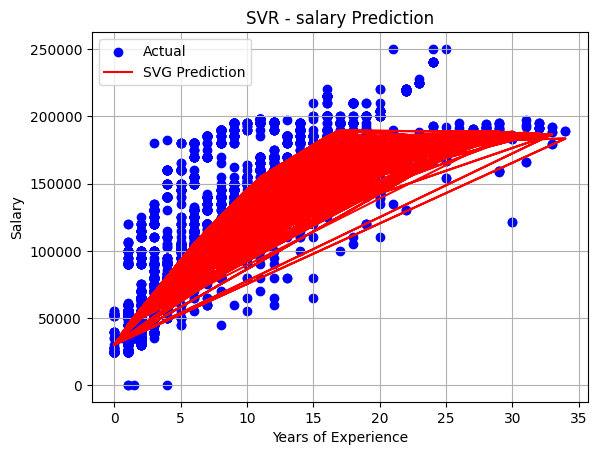

In [74]:
import matplotlib.pyplot as plt
plt.scatter(x,y,color='blue',label='Actual')
plt.plot(x,y_pred,color='red',label='SVG Prediction')
plt.title('SVR - salary Prediction')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid()
plt.legend()
plt.show()

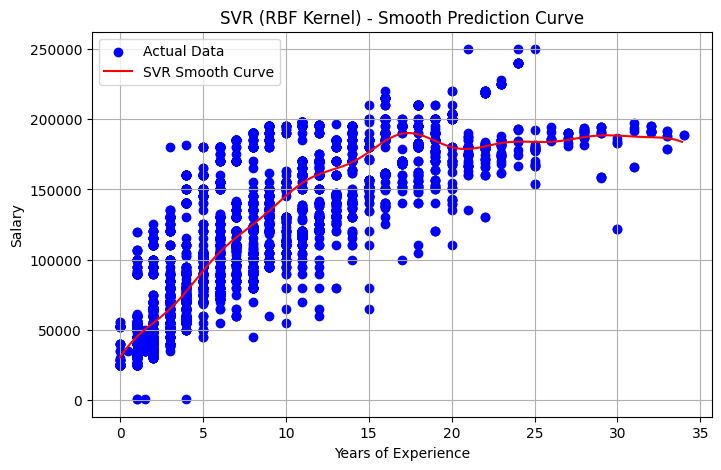

In [76]:
import numpy as np
import matplotlib.pyplot as plt
X_grid = np.arange(min(x.ravel()),max(x.ravel()),0.1)
X_grid = X_grid.reshape(-1,1)
X_grid_scaled = sc_x.transform(X_grid)
y_grid_scaled = svr.predict(X_grid_scaled)
y_grid = sc_y.inverse_transform(y_grid_scaled.reshape(-1,1))
plt.figure(figsize=(8,5))
plt.scatter(x,y,color='blue',label='Actual Data')
plt.plot(X_grid,y_grid,color='red',label='SVR Smooth Curve')
plt.title('SVR (RBF Kernel) - Smooth Prediction Curve')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid()
plt.legend()
plt.show()

In [77]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 759013901.8514212
Root Mean Squared Error (RMSE): 27550.20692937571
R-squared (R2) Score: 0.7275580175081495


kernel: LINEAR | R2 Score: 0.6326


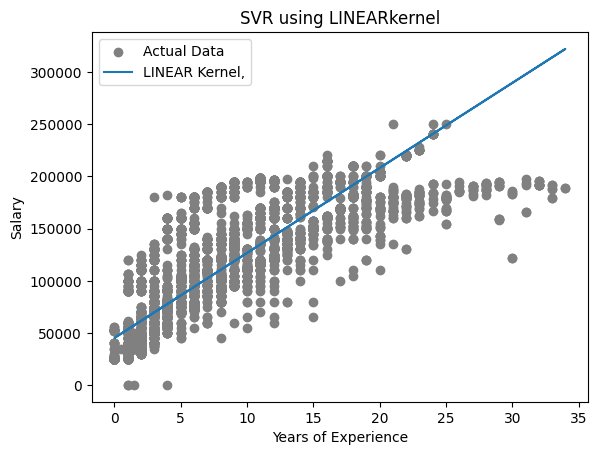

kernel: POLY | R2 Score: 0.0578


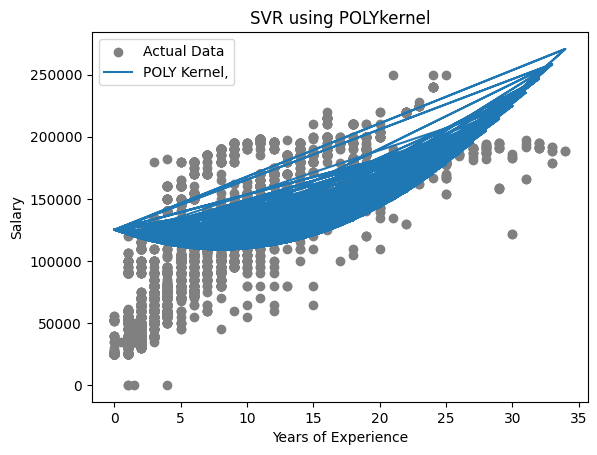

kernel: RBF | R2 Score: 0.7249


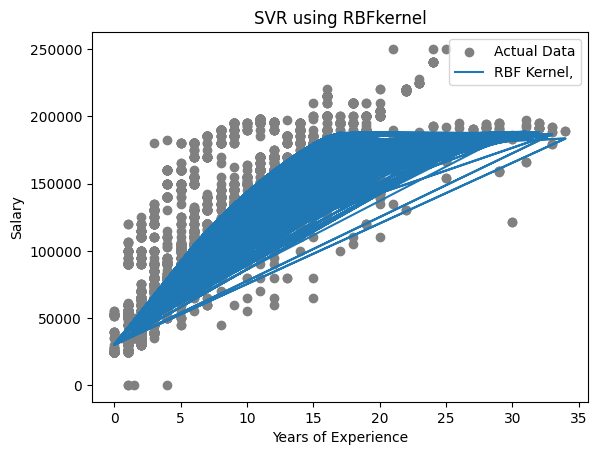

In [81]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

x = df[['Years of Experience']].values
y = df[['Salary']].values

sc_x = StandardScaler()
sc_y = StandardScaler()
x_scaled = sc_x.fit_transform(x)
y_scaled = sc_y.fit_transform(y).ravel() # Added parentheses here
kernels = ['linear','poly','rbf']
for kernel in kernels:
    if kernel == 'poly':
        model = SVR(kernel=kernel,degree=2)
    else:
        model = SVR(kernel=kernel)
    model.fit(x_scaled,y_scaled)
    y_pred_scaled = model.predict(x_scaled)
    y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))
    score = r2_score(y,y_pred)
    print(f"kernel: {kernel.upper()} | R2 Score: {score:.4f}")
    plt.scatter(x, y, color='gray', label='Actual Data') # Changed X to x
    plt.plot(x, y_pred, label=f'{kernel.upper()} Kernel,') # Changed X to x
    plt.title(f'SVR using {kernel.upper()}kernel')
    plt.xlabel("Years of Experience")
    plt.ylabel("Salary")
    plt.legend()
    plt.show()

try different C and espsilon value

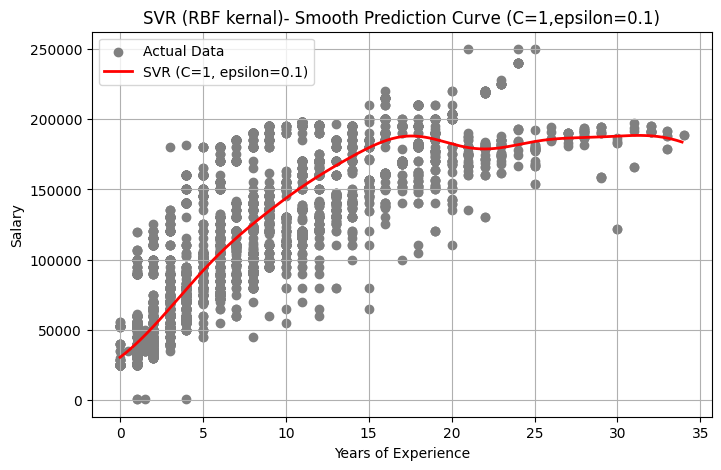

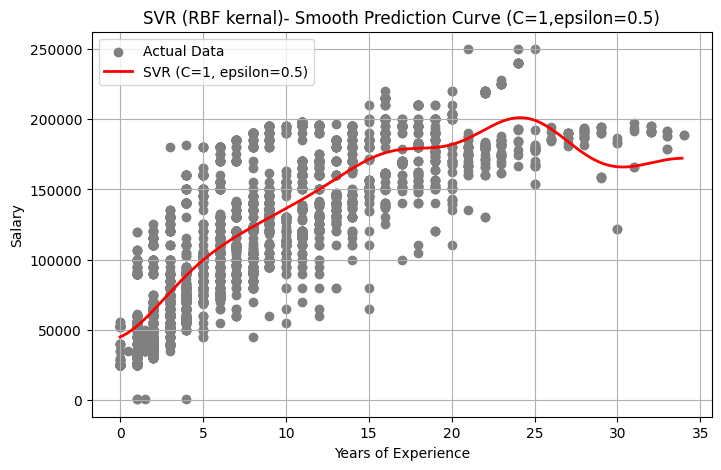

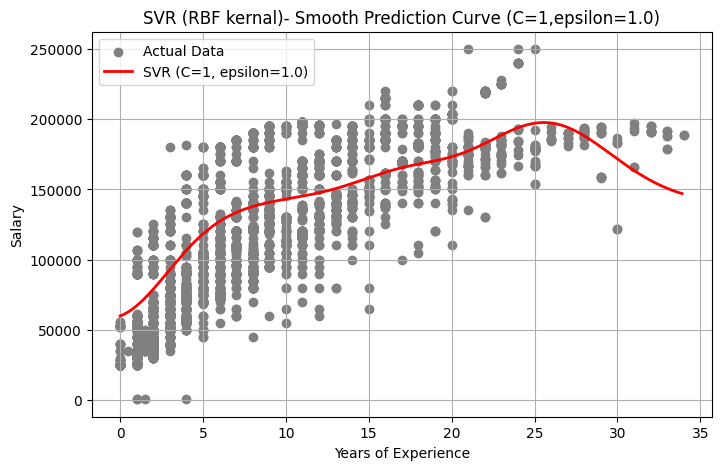

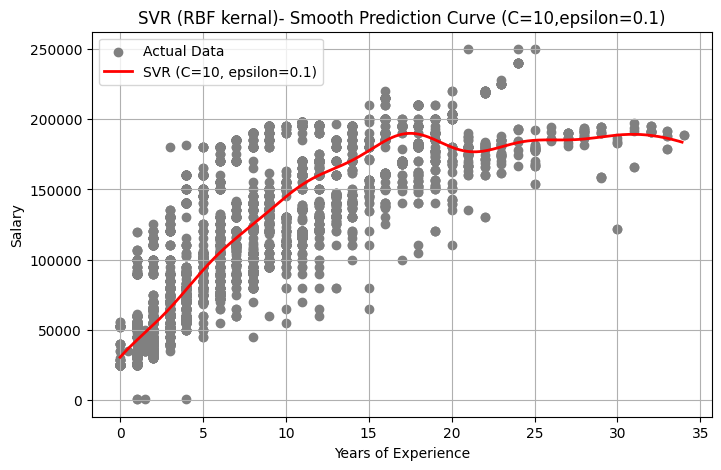

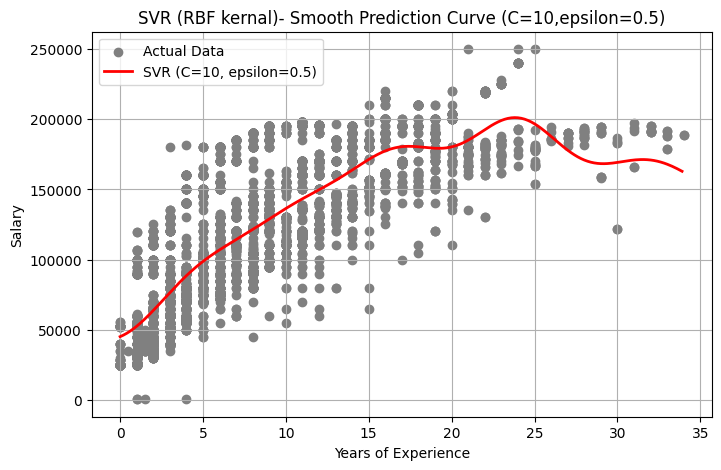

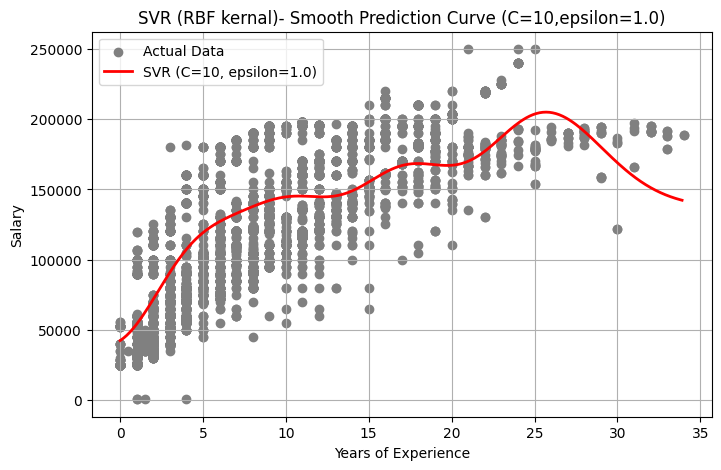

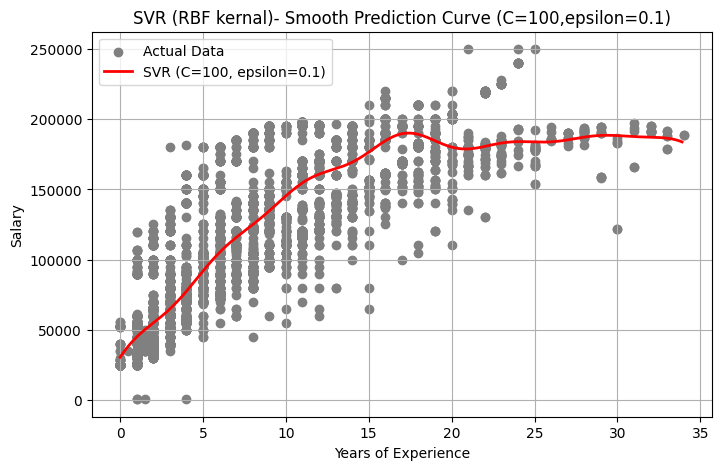

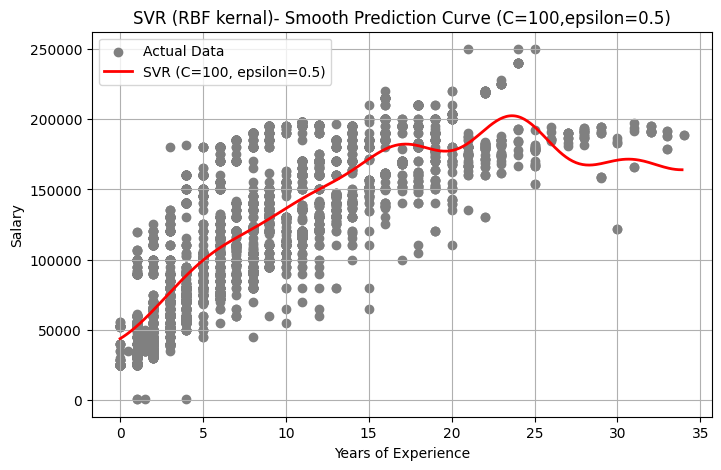

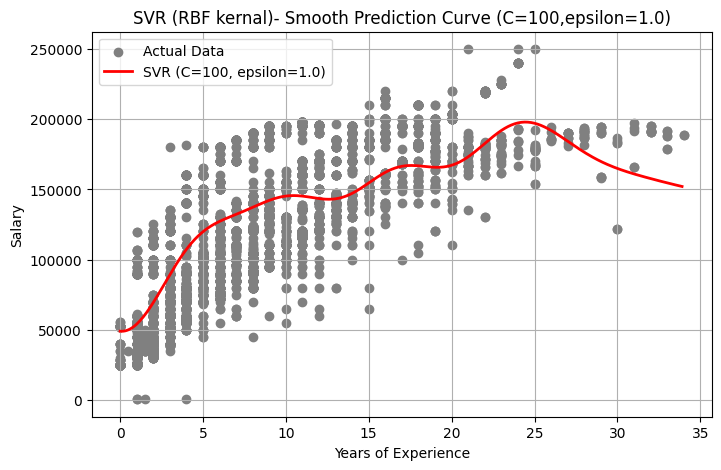

In [87]:
C_values = [1, 10, 100]
epsilon_values = [0.1, 0.5, 1.0]
X_grid = np.arange(min(x.ravel()), max(x.ravel()), 0.1)
X_grid = X_grid.reshape(-1, 1)
X_grid_scaled = sc_x.transform(X_grid)
for C in C_values:
    for epsilon in epsilon_values:
      model = SVR(kernel='rbf', C=C, epsilon=epsilon)
      model.fit(x_scaled, y_scaled)
      y_grid_scaled = model.predict(X_grid_scaled)
      y_grid = sc_y.inverse_transform(y_grid_scaled.reshape(-1, 1))
      plt.figure(figsize=(8, 5))
      plt.scatter(x, y, color='gray', label='Actual Data')
      plt.plot(X_grid, y_grid, color='red', label=f'SVR (C={C}, epsilon={epsilon})',linewidth=2)
      plt.title(f'SVR (RBF kernal)- Smooth Prediction Curve (C={C},epsilon={epsilon})')
      plt.xlabel('Years of Experience')
      plt.ylabel('Salary')
      plt.grid(True)
      plt.legend()
      plt.show()